
To-do: 

* helper functions to trim and bin data - 
* simple correlations
* visualization/summary of dataset
* build network?
* align spikes to move (0-500 ms after response)



In [1]:
# Data Loading

#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [2]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [4]:
print(alldat[0].keys())
#print(np.size(alldat[0].spks))


dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


In [5]:
import copy
class SteinmetzSession:
  data = []
  binSize = 10
  nTrials = []
  nNeurons = []
  trialLen = 0
  trimStart = "trialStart"
  trimEnd =  "trialEnd"
  def __init__(self, dataIn):
    self.data = copy.deepcopy(dataIn)
    dims1 = np.shape(dataIn['spks'])
    self.nTrials = dims1[1]
    self.nNeurons = dims1[0]
    self.trialLen = dims1[2]

  def binData(self, binSizeIn): # Inputs: data, scalar for binning. Combines binSizeIn bins together to bin data smaller Ex. binSizeIn of 5 on the original dataset combines every 5 10 ms bins into one 50 ms bin across all trials.
    varsToRebinSum = ['spks']
    varsToRebinMean = ['wheel', 'pupil']
    spikes = self.data['spks']
    histVec = range(0,self.trialLen+1, binSizeIn)
    spikesBin = np.zeros((self.nNeurons, self.nTrials, len(histVec)))
    print(histVec)
    for trial in range(self.nTrials):
      spikes1 = np.squeeze(spikes[:,trial,:])
      for time1 in range(len(histVec)-1):
        spikesBin[:,trial, time1] = np.sum(spikes1[:, histVec[time1]:histVec[time1+1]-1], axis=1)

    spikesBin = spikesBin[:,:,:-1]
    self.data['spks'] = spikesBin
    self.trialLen = len(histVec) -1
    self.binSize = self.binSize*binSizeIn

    
    s = "Binned spikes, turning a " + repr(np.shape(spikes)) + " matrix into a " + repr(np.shape(spikesBin)) + " matrix"
    print(s)

  def plotTrial(self, trialNum): # Basic function to plot the firing rate during a single trial. Used for debugging trimming and binning
    plt.imshow(np.squeeze(self.data['spks'][:,trialNum,:])**.5, aspect = 'auto')
    plt.xlabel("Time (bins)")
    plt.ylabel("Neuron #")

  def trimData(self, trimStartIn, trimEndIn): # TODO: Implement trial trimming
    return 0


s1 = SteinmetzSession(alldat[0])



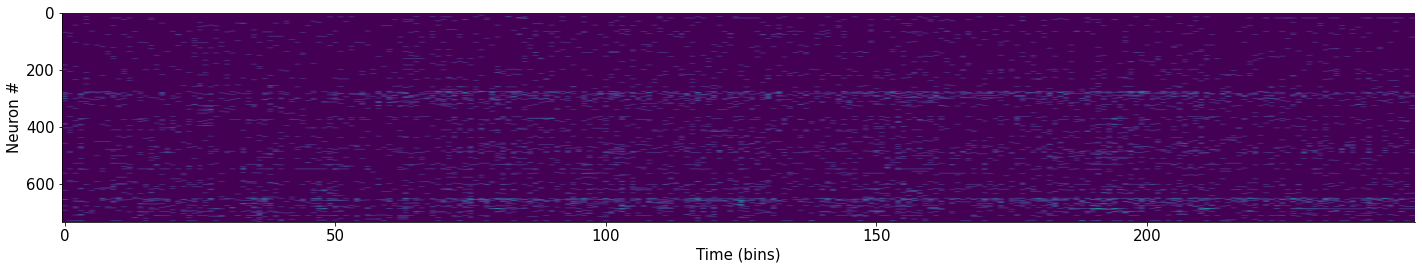

In [6]:
s1.plotTrial(1)


range(0, 251, 10)
Binned spikes, turning a (734, 214, 250) matrix into a (734, 214, 25) matrix


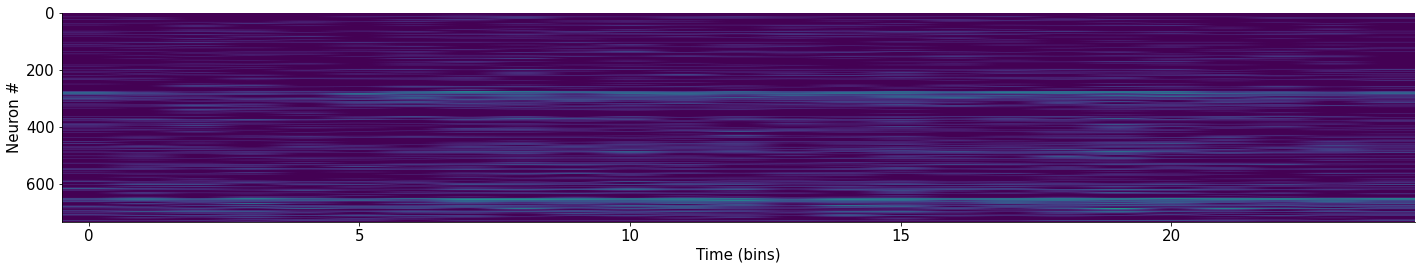

In [7]:
s1.binData(10)
s1.plotTrial(1)